In [1]:
%load_ext autoreload
%autoreload 2

# Load data

In [2]:
from filter_utils import *
import re

In [3]:
experiment_table, sample_df, replicate_df = load_experiment_manifest()

In [4]:
LOAD_SEQUENCES = False

sample_to_filtered_tis = dict()
samples = experiment_table['sample'].tolist()

for sample in samples:
    filt_table = pd.read_csv(experiment_table.set_index('sample').loc[sample, 'filtered_file'])
    if LOAD_SEQUENCES:
        pred_table = pd.read_csv(experiment_table.loc[sample, 'predict_file'], sep='\t', usecols=['Tid', 'GenomePos', 'Start', 'Seq', 'AASeq'])
        merged_table = filt_table.merge(pred_table, left_on=['Tid', 'GenomePos', 'Start'], right_on=['Tid', 'GenomePos', 'Start'], how='left')
    else:
        merged_table = filt_table
    sample_to_filtered_tis[sample] = merged_table
all_tis_df= pd.concat(sample_to_filtered_tis, axis=0).reset_index(names=['Sample', 'drop']).drop(['drop'], axis=1)

In [5]:
all_tis_df['TIS_ID'] = all_tis_df['Tid'] + ':' + all_tis_df['Start'].astype(str)
tis_annotation_df = all_tis_df[['TIS_ID', 'Tid', 'Symbol', 'GenomePos', 'Start', 'StartCodon', 'RecatTISType', 'MANE_Select', 'transcript_support_level']].drop_duplicates()

In [6]:
all_tis_df[all_tis_df['MANE_Select']].to_csv('/lab/barcheese01/smaffa/filtered_tis_data/combined/all_samples_filtered_mane_only.csv', index=False)

In [ ]:
all_tis_df.to_csv('/lab/barcheese01/smaffa/filtered_tis_data/all_samples_filtered.csv', index=False)

In [99]:
start_codon_annotations = load_transcript_annotations(GTF_FILE, feature_type='start_codon')

In [139]:
utr_annotations = load_transcript_annotations(GTF_FILE, feature_type="UTR")

In [142]:
utr_annotations

,chromosome,source,feature_type,start,end,score,strand,frame,gene_id,gene_type,transcript_id,transcript_type,transcript_support_level,MANE_Select,attributes
0,chr1,HAVANA,UTR,65419,65433,.,+,.,ENSG00000186092.7,protein_coding,ENST00000641515.2,protein_coding,NaN,True,"gene_id ""ENSG00000186092.7""; transcript_id ""EN..."
1,chr1,HAVANA,UTR,65520,65564,.,+,.,ENSG00000186092.7,protein_coding,ENST00000641515.2,protein_coding,NaN,True,"gene_id ""ENSG00000186092.7""; transcript_id ""EN..."
2,chr1,HAVANA,UTR,70006,71585,.,+,.,ENSG00000186092.7,protein_coding,ENST00000641515.2,protein_coding,NaN,True,"gene_id ""ENSG00000186092.7""; transcript_id ""EN..."
3,chr1,HAVANA,UTR,450740,450742,.,-,.,ENSG00000284733.2,protein_coding,ENST00000426406.4,protein_coding,NA,True,"gene_id ""ENSG00000284733.2""; transcript_id ""EN..."
4,chr1,HAVANA,UTR,685716,685718,.,-,.,ENSG00000284662.2,protein_coding,ENST00000332831.5,protein_coding,NA,True,"gene_id ""ENSG00000284662.2""; transcript_id ""EN..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770743,KI270734.1,ENSEMBL,UTR,156447,156497,.,-,.,ENSG00000277196.4,protein_coding,ENST00000615165.1,protein_coding,1,False,"gene_id ""ENSG00000277196.4""; transcript_id ""EN..."
770744,KI270734.1,ENSEMBL,UTR,138082,138482,.,-,.,ENSG00000277196.4,protein_coding,ENST00000615165.1,protein_coding,1,False,"gene_id ""ENSG00000277196.4""; transcript_id ""EN..."
770745,KI270734.1,ENSEMBL,UTR,161689,161852,.,-,.,ENSG00000277196.4,protein_coding,ENST00000621424.4,protein_coding,1,False,"gene_id ""ENSG00000277196.4""; transcript_id ""EN..."
770746,KI270734.1,ENSEMBL,UTR,161587,161626,.,-,.,ENSG00000277196.4,protein_coding,ENST00000621424.4,protein_coding,1,False,"gene_id ""ENSG00000277196.4""; transcript_id ""EN..."


In [105]:
txn_ids = all_tis_df['Tid'].unique().tolist()

In [136]:
all_tis_df[all_tis_df['Tid'] == 'ENST00000258149.11']

,Sample,Gid,Tid,Symbol,GeneType,GenomePos,Start,StartCodon,TisType,RecatTISType,TISGroup,TISCounts,NormTISCounts,AALen,MANE_Select,transcript_support_level,TIS_ID
14610,HeLa,ENSG00000135679.28,ENST00000258149.11,MDM2,protein_coding,chr12:68809226-68839849:+,334,ATG,Truncated:Known,Truncated,0,19,0.363792,486,True,1.0,ENST00000258149.11:334
14611,HeLa,ENSG00000135679.28,ENST00000258149.11,MDM2,protein_coding,chr12:68820346-68839849:+,631,AGG,Truncated,Truncated,0,7,0.134029,387,True,1.0,ENST00000258149.11:631
61719,K562,ENSG00000135679.28,ENST00000258149.11,MDM2,protein_coding,chr12:68808483-68839849:+,307,AGG,Truncated,Truncated,0,6,0.221495,495,True,1.0,ENST00000258149.11:307
61720,K562,ENSG00000135679.28,ENST00000258149.11,MDM2,protein_coding,chr12:68809226-68839849:+,334,ATG,Truncated:Known,Truncated,0,12,0.442990,486,True,1.0,ENST00000258149.11:334
61721,K562,ENSG00000135679.28,ENST00000258149.11,MDM2,protein_coding,chr12:68808380-68808425:+,204,ATG,5'UTR,uORF,0,44,1.624298,14,True,1.0,ENST00000258149.11:204
61722,K562,ENSG00000135679.28,ENST00000258149.11,MDM2,protein_coding,chr12:68808225-68808291:+,49,GTG,5'UTR,uORF,0,6,0.221495,21,True,1.0,ENST00000258149.11:49
61723,K562,ENSG00000135679.28,ENST00000258149.11,MDM2,protein_coding,chr12:68808246-68808291:+,70,ATG,5'UTR,uORF,0,122,4.503734,14,True,1.0,ENST00000258149.11:70
100822,RPE1_Async,ENSG00000135679.28,ENST00000258149.11,MDM2,protein_coding,chr12:68809226-68839849:+,334,ATG,Truncated:Known,Truncated,0,4,0.197870,486,True,1.0,ENST00000258149.11:334
100823,RPE1_Async,ENSG00000135679.28,ENST00000258149.11,MDM2,protein_coding,chr12:68813562-68839849:+,409,AAG,Truncated,Truncated,0,4,0.197870,461,True,1.0,ENST00000258149.11:409
136339,RPE1_Que,ENSG00000135679.28,ENST00000258149.11,MDM2,protein_coding,chr12:68808483-68839849:+,307,AGG,Truncated,Truncated,0,2,0.187216,495,True,1.0,ENST00000258149.11:307


In [114]:
start_codon_annotations[start_codon_annotations['transcript_id'].isin(txn_ids)].head().loc[:, 'attributes'].iloc[0]

'gene_id "ENSG00000187634.14"; transcript_id "ENST00000616016.5"; gene_type "protein_coding"; gene_name "SAMD11"; transcript_type "protein_coding"; transcript_name "SAMD11-209"; exon_number 1; exon_id "ENSE00001637883.3"; level 2; protein_id "ENSP00000478421.2"; transcript_support_level "5"; hgnc_id "HGNC:28706"; tag "CAGE_supported_TSS"; tag "RNA_Seq_supported_partial"; tag "basic"; tag "Ensembl_canonical"; tag "GENCODE_Primary"; tag "MANE_Select"; tag "appris_alternative_2"; tag "CCDS"; ccdsid "CCDS90834.1"; havana_gene "OTTHUMG00000040719.11"; havana_transcript "OTTHUMT00000316521.3";'

In [134]:
from Bio import Seq, SeqIO

gencode_protein_products = dict()
for record in SeqIO.parse('/lab/barcheese01/smaffa/reference/gencode.v49.pc_translations.fa', format='fasta'):
    sequence_ids = record.id
    transcript_id = [tag for tag in sequence_ids.split('|') if 'ENST' in tag][0]
    gencode_protein_products[transcript_id] = str(record.seq)
gencode_protein_products = pd.DataFrame(pd.Series(gencode_protein_products), columns=['AASeq']).reset_index(names=['Tid'])
gencode_protein_products['AALen'] = gencode_protein_products['AASeq'].apply(lambda x: len(x))

In [135]:
gencode_protein_products

,Tid,AASeq,AALen
0,ENST00000641515.2,MKKVTAEAISWNESTSETNNSMVTEFIFLGLSDSQELQTFLFMLFF...,326
1,ENST00000426406.4,MDGENHSVVSEFLFLGLTHSWEIQLLLLVFSSVLYVASITGNILIV...,312
2,ENST00000332831.5,MDGENHSVVSEFLFLGLTHSWEIQLLLLVFSSVLYVASITGNILIV...,312
3,ENST00000968544.1,MPAVKKEFPGREDLALALATFHPTLAALPLPPLPGYLAPLPAAAAL...,815
4,ENST00000616016.5,MPAVKKEFPGREDLALALATFHPTLAALPLPPLPGYLAPLPAAAAL...,844
...,...,...,...
245530,ENST00000619792.1,MDSLWGPGAGSHPFGVHNTRLSPDLCPGKIVLRALKESGAGMPEQD...,429
245531,ENST00000617983.1,MDSLWGPGAGSHPFGVHNTRLSPDLCPGKIVLRALKESGAGMPEQD...,429
245532,ENST00000613204.1,MERYAGALEEVADGARQQERHYQLLSALQSLVKELPSSFQQRLSYT...,220
245533,ENST00000615165.1,MKMTFYGHFVAGEDQESIQPLLRHYRAFGVSAILDYGVEEDLSPEE...,492


# Some global summary statistics

In [7]:
raw_tis_counts_matrix = all_tis_df.pivot_table(index='Sample', columns='TIS_ID', values='TISCounts', aggfunc=np.sum).fillna(0)
norm_tis_counts_matrix = all_tis_df.pivot_table(index='Sample', columns='TIS_ID', values='NormTISCounts', aggfunc=np.sum).fillna(0)

Text(0.5, 1.0, 'Relative start codon usage')

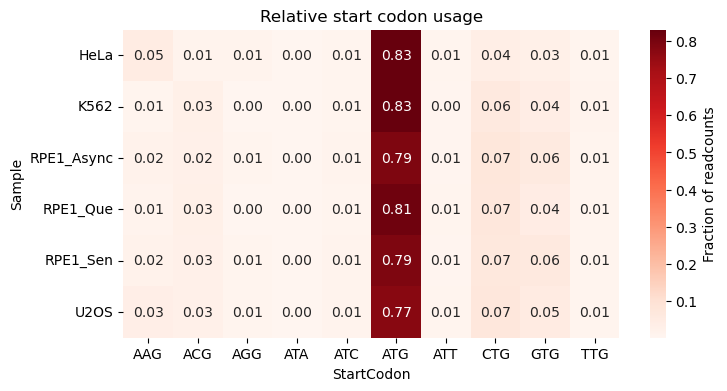

In [8]:
start_codon_usage = all_tis_df.pivot_table(index='Sample', columns='StartCodon', values='TISCounts', aggfunc=np.sum)
plt.figure(figsize=(8, 4))
sns.heatmap(
    (start_codon_usage.T / start_codon_usage.sum(axis=1)).T, cmap='Reds', annot=True, fmt='.2f', cbar_kws={'label': 'Fraction of readcounts'}
)
plt.title('Relative start codon usage')

In [9]:
any_gene_translation_norm_count_matrix = norm_tis_counts_matrix.T.merge(
    tis_annotation_df[['TIS_ID', 'Symbol']], left_index=True, right_on='TIS_ID', how='inner'
).groupby('Symbol')[samples].sum().T

(0.0, 200.0)

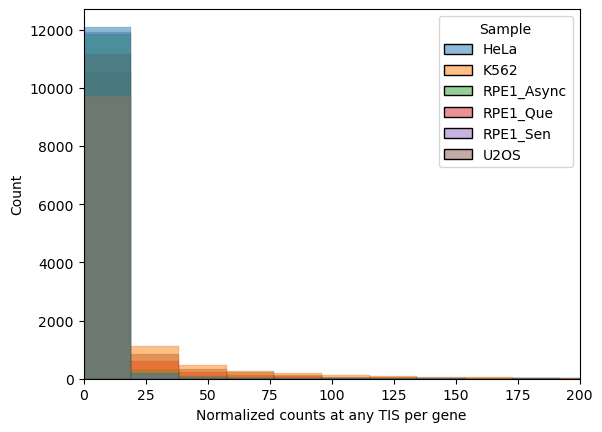

In [18]:
sns.histplot(
    any_gene_translation_norm_count_matrix.melt(ignore_index=False).reset_index(names=['Sample']),
    x='value', hue='Sample'
)
plt.xlabel('Normalized counts at any TIS per gene')
plt.xlim(0, 200)

In [11]:
annotated_translation_norm_count_matrix = norm_tis_counts_matrix.T.merge(
    tis_annotation_df[tis_annotation_df['RecatTISType'] == 'Annotated'].loc[:, ['TIS_ID', 'Symbol']], left_index=True, right_on='TIS_ID', how='inner'
).groupby('Symbol')[samples].sum().T

(0.0, 200.0)

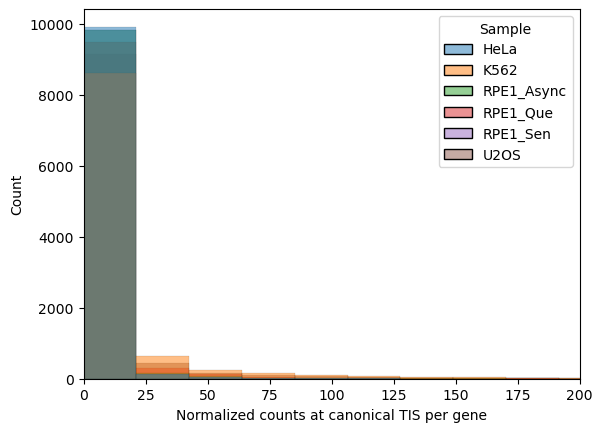

In [17]:
sns.histplot(
    annotated_translation_norm_count_matrix.melt(ignore_index=False).reset_index(names=['Sample']),
    x='value', hue='Sample'
)
plt.xlabel('Normalized counts at canonical TIS per gene')
plt.xlim(0, 200)

In [12]:
canonical_count_fraction = (
    annotated_translation_norm_count_matrix.reindex_like(any_gene_translation_norm_count_matrix).fillna(0) / 
    any_gene_translation_norm_count_matrix
)

Text(0.5, 0, 'Fraction of counts per gene at canonical TIS')

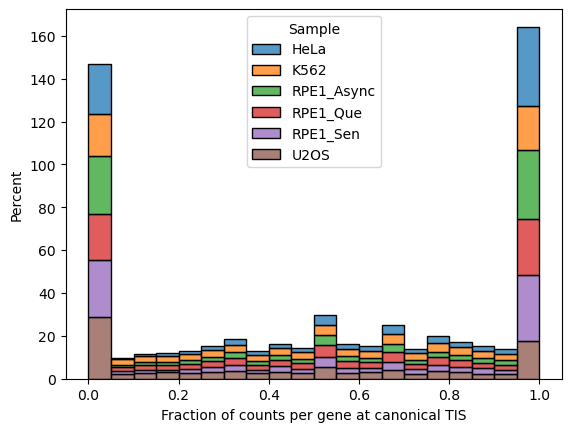

In [28]:
sns.histplot(
    canonical_count_fraction.melt(ignore_index=False).reset_index(names=['Sample']),
    x='value', hue='Sample', binwidth=0.05, multiple='stack', stat='percent', common_norm=False, legend=True
)
plt.xlabel('Fraction of counts per gene at canonical TIS')

In [68]:
tis_subsets = dict()
for s in samples:
    tis_subsets[f'{s}:Canonical==0'] = all_tis_df[
        (all_tis_df['Sample'] == s) &
        all_tis_df['Symbol'].isin(canonical_count_fraction.loc[s, canonical_count_fraction.loc[s] == 0].index.tolist())
    ]
    tis_subsets[f'{s}:Background'] = all_tis_df[
        (all_tis_df['Sample'] == s) &
        (all_tis_df['RecatTISType'] != 'Annotated')
    ]

In [77]:
def plot_tis_type_distribution(subset_dict):
    tis_to_plot = pd.concat(subset_dict).reset_index(names=['Group', 'drop'])
    sns.histplot(
        tis_to_plot, x='Group', hue='RecatTISType', stat='proportion', multiple='fill', shrink=0.8
    )
    plt.xticks(rotation=90)
    return plt.gca()

<Axes: xlabel='AALen', ylabel='NormTISCounts'>

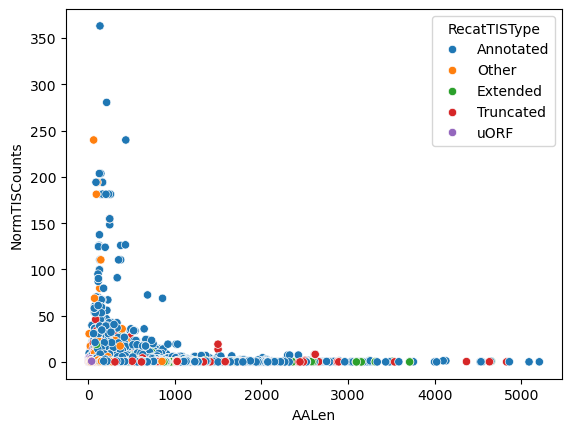

In [89]:
sns.scatterplot(
    all_tis_df[all_tis_df['Sample'] == 'HeLa'], 
    x='AALen', y='NormTISCounts',
    hue='RecatTISType'
)

<Axes: xlabel='NormTISCounts', ylabel='Density'>

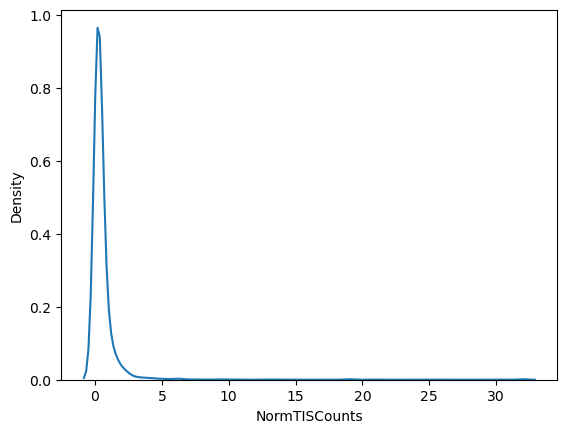

In [81]:
sns.kdeplot(tis_subset, x='NormTISCounts')

<Axes: xlabel='AALen', ylabel='Sample'>

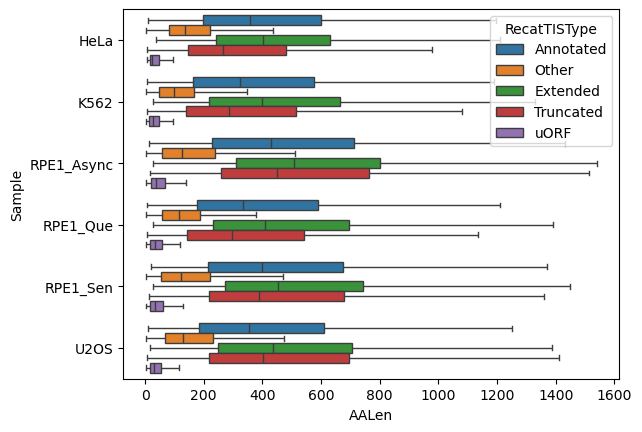

In [87]:
sns.boxplot(
    all_tis_df, x='AALen', y='Sample', hue='RecatTISType', dodge=True, showfliers=False
)

<Axes: xlabel='AALen', ylabel='Sample'>

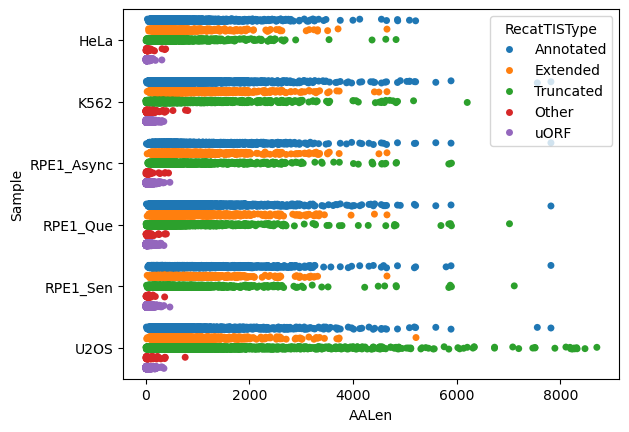

In [88]:
sns.stripplot(
    all_tis_df[all_tis_df['MANE_Select']], x='AALen', y='Sample', hue='RecatTISType', dodge=True
)

<Axes: xlabel='AALen', ylabel='Density'>

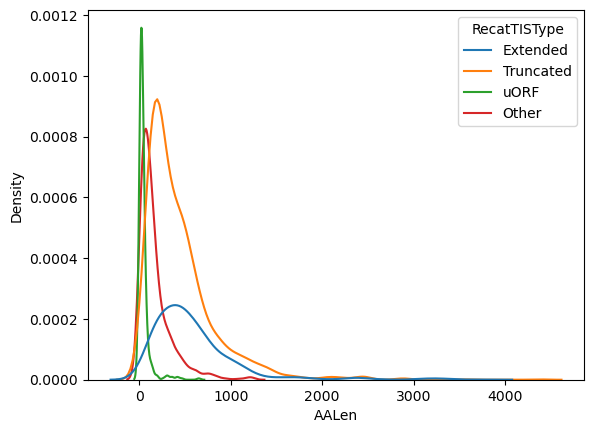

In [83]:
sns.kdeplot(tis_subset, hue='RecatTISType', x='AALen')

<Axes: xlabel='Group', ylabel='Proportion'>

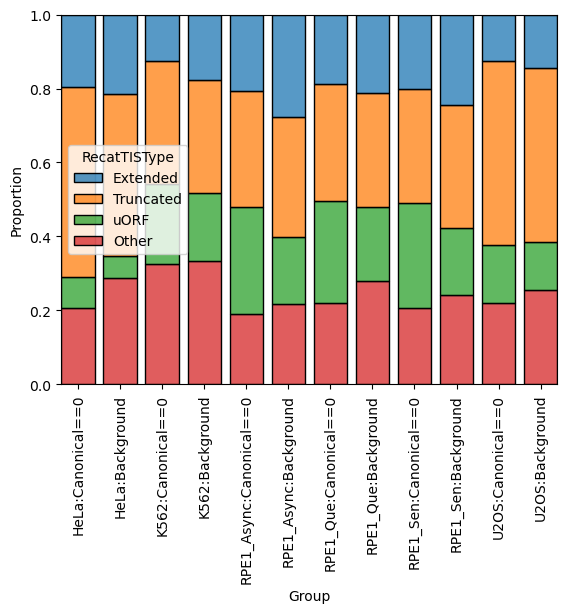

In [78]:
plot_tis_type_distribution(tis_subsets)

<Axes: xlabel='RecatTISType', ylabel='count'>

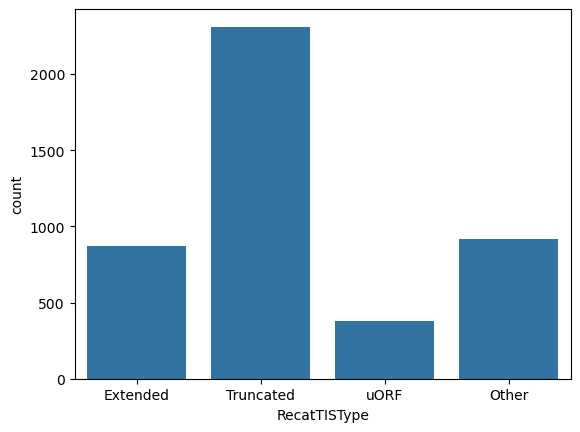

In [ ]:
sns.countplot(all_tis_df, x='RecatTISType')
sns.countplot(tis_subset, x='RecatTISType')

In [79]:
canonical_count_fraction

Symbol,A1BG,A1BG-AS1,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,AAMDC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
HeLa,NaN,NaN,1.0,0.0,0.666667,0.000000,NaN,0.500000,NaN,1.000000,...,NaN,0.670968,1.000000,NaN,1.000000,NaN,0.000000,1.000000,0.500000,1.000000
K562,0.0,NaN,NaN,NaN,0.515291,1.000000,NaN,0.500000,0.583333,0.625000,...,0.142857,0.524138,1.000000,NaN,1.000000,0.6,0.024691,0.923567,0.419355,0.294118
RPE1_Async,0.0,NaN,NaN,NaN,0.839024,0.680000,NaN,0.500000,0.750000,NaN,...,0.500000,0.727273,1.000000,NaN,NaN,NaN,0.000000,0.711443,0.500000,1.000000
RPE1_Que,0.0,0.0,NaN,NaN,1.000000,0.761905,NaN,0.481481,0.750000,0.404959,...,NaN,NaN,1.000000,1.0,0.400000,NaN,0.187500,0.904412,0.411765,0.125000
RPE1_Sen,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.500000,1.000000,NaN,...,NaN,NaN,1.000000,NaN,0.000000,NaN,0.000000,1.000000,0.500000,0.000000
U2OS,NaN,NaN,1.0,NaN,0.436261,0.936170,0.75,0.500000,0.571429,NaN,...,0.625000,0.742268,0.857143,0.0,0.444444,NaN,0.000000,0.672131,0.263158,0.052632
